In [ ]:
'''
changed loss function in updated QNN circuit with (128x128) and 6 qubits
removed weighted sampler
changing weight decay to 0.005
changed patience - 5
changed optimizer to adam with momentum
quantum layers = 6
gamma = 1.5

*** need to run this model again as saved model was manipulated by other code ***


bad accuracy for classes with small data size, which can be improved
'''

**dataset loaded**
Starting training
Start training


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 1/50 | Train Loss: 2.0577 | Train Acc: 0.2866 | Val Acc: 0.3619


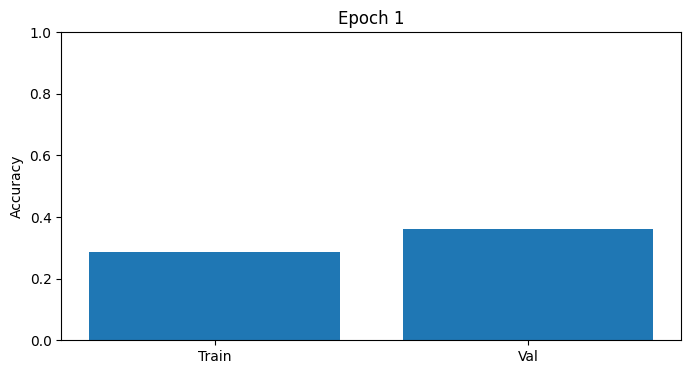

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 2/50 | Train Loss: 1.3823 | Train Acc: 0.3946 | Val Acc: 0.4464


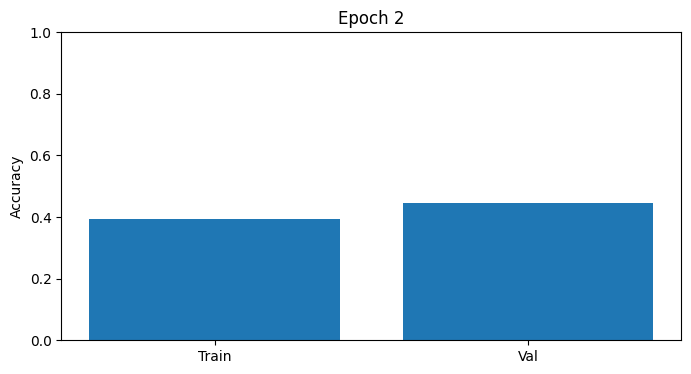

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 3/50 | Train Loss: 1.1375 | Train Acc: 0.4444 | Val Acc: 0.4269


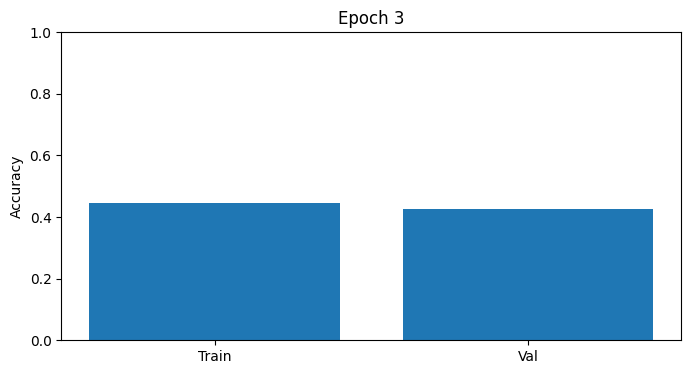

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 4/50 | Train Loss: 0.9502 | Train Acc: 0.4641 | Val Acc: 0.5016


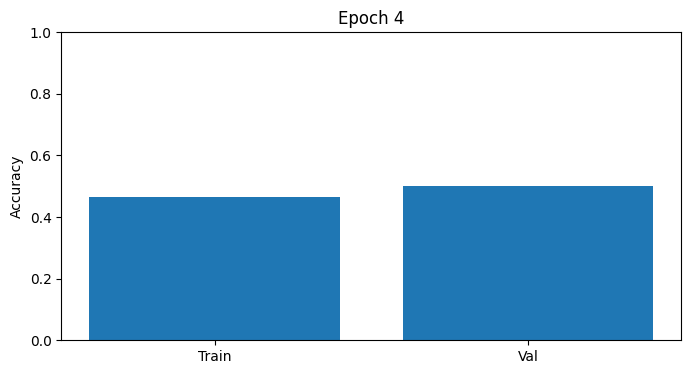

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 5/50 | Train Loss: 0.8277 | Train Acc: 0.4884 | Val Acc: 0.5222


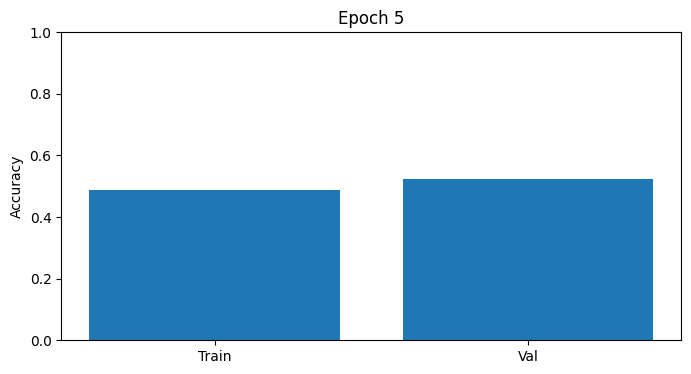

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 6/50 | Train Loss: 0.7304 | Train Acc: 0.5844 | Val Acc: 0.5265


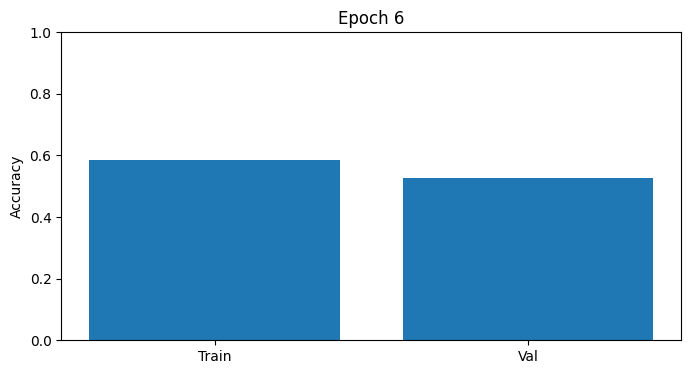

🕒 No improvement for 1 epoch(s).


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 7/50 | Train Loss: 0.6656 | Train Acc: 0.6603 | Val Acc: 0.5374


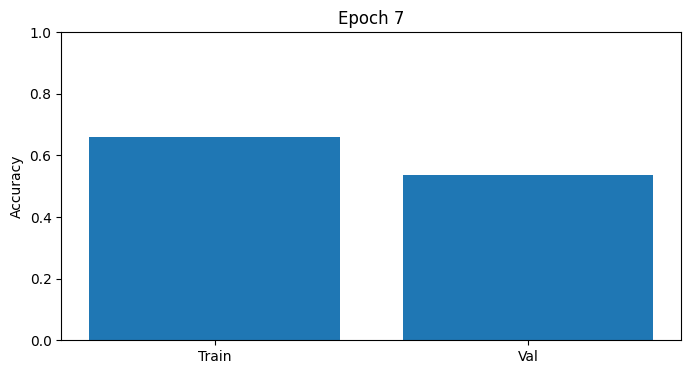

🕒 No improvement for 2 epoch(s).


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 8/50 | Train Loss: 0.5962 | Train Acc: 0.6812 | Val Acc: 0.6338


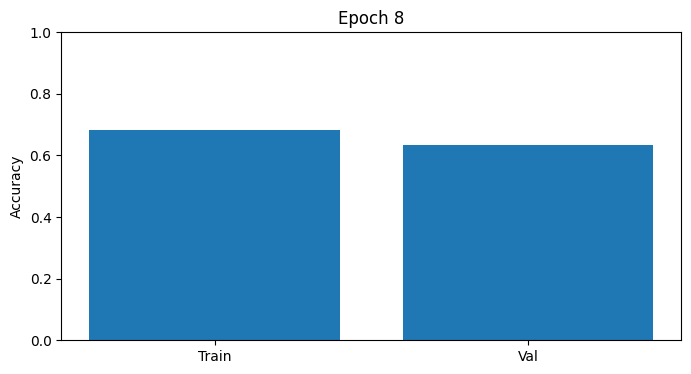

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 9/50 | Train Loss: 0.5620 | Train Acc: 0.7009 | Val Acc: 0.7248


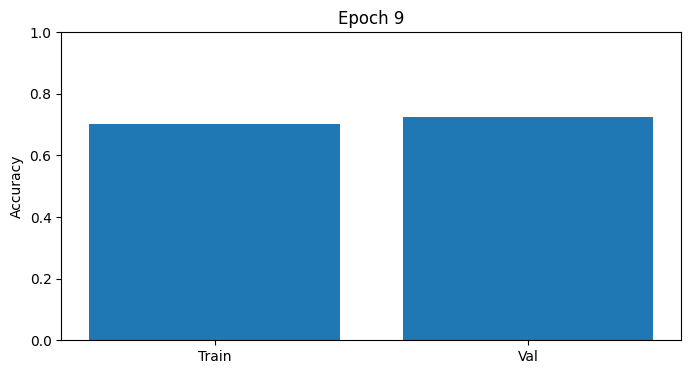

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 10/50 | Train Loss: 0.5336 | Train Acc: 0.7182 | Val Acc: 0.6089


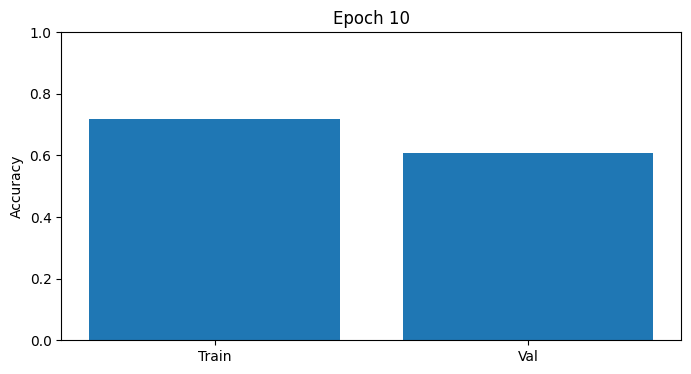

🕒 No improvement for 1 epoch(s).


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 11/50 | Train Loss: 0.5054 | Train Acc: 0.7350 | Val Acc: 0.8104


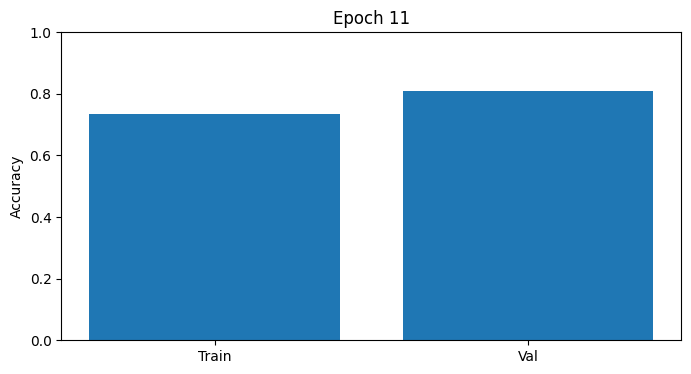

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 12/50 | Train Loss: 0.4616 | Train Acc: 0.7481 | Val Acc: 0.8321


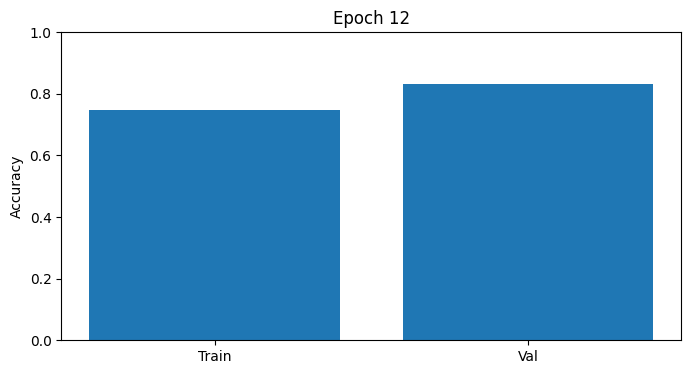

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 13/50 | Train Loss: 0.4520 | Train Acc: 0.7535 | Val Acc: 0.8407


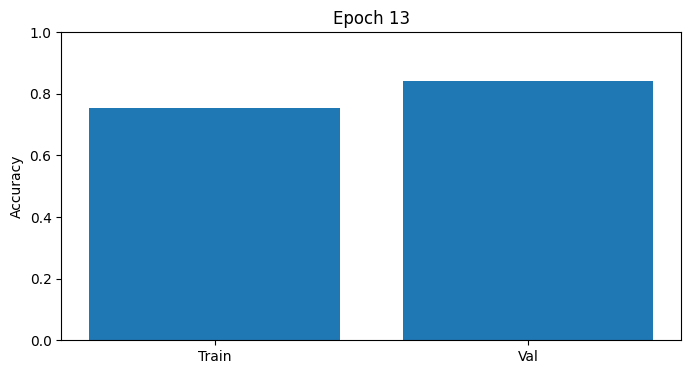

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 16/50 | Train Loss: 0.4073 | Train Acc: 0.7862 | Val Acc: 0.8624


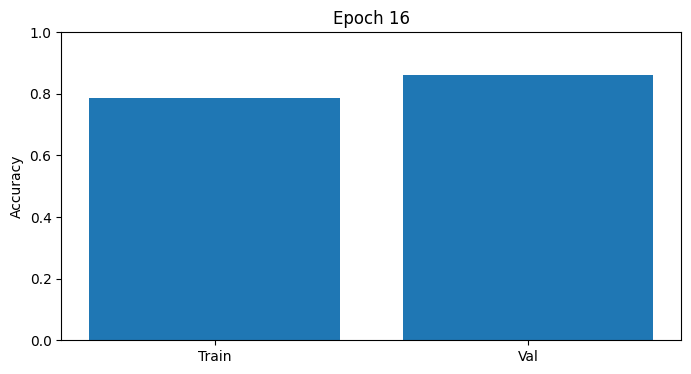

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 17/50 | Train Loss: 0.3809 | Train Acc: 0.7922 | Val Acc: 0.8667


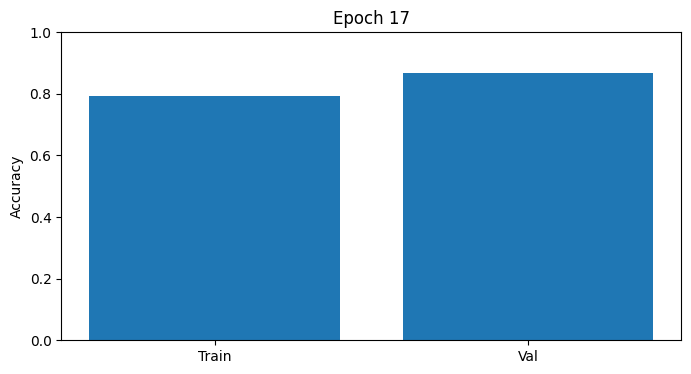

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 18/50 | Train Loss: 0.3640 | Train Acc: 0.7939 | Val Acc: 0.8971


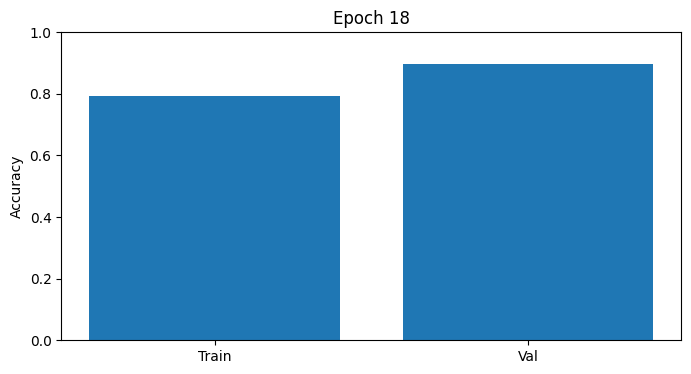

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 19/50 | Train Loss: 0.3500 | Train Acc: 0.7981 | Val Acc: 0.8678


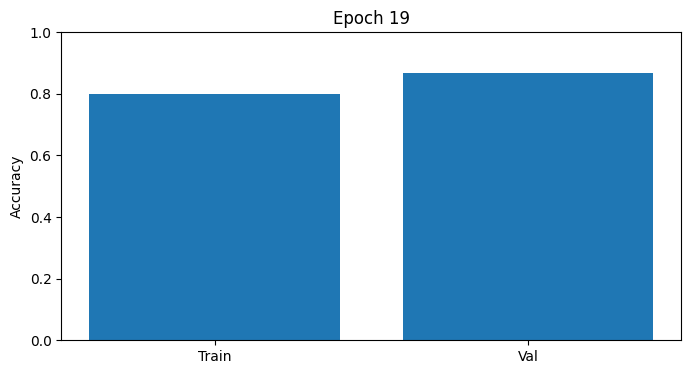

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 20/50 | Train Loss: 0.3350 | Train Acc: 0.8005 | Val Acc: 0.8732


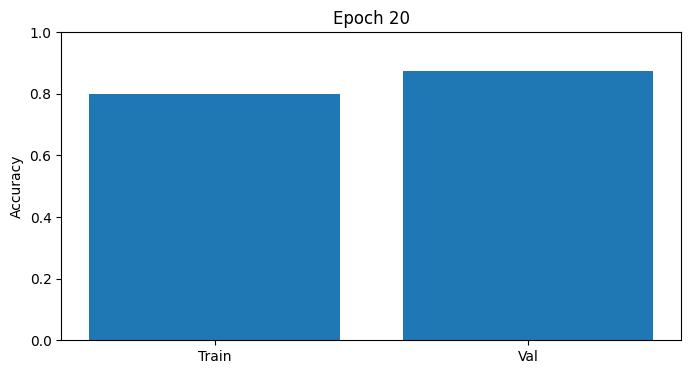

🕒 No improvement for 1 epoch(s).


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 21/50 | Train Loss: 0.3113 | Train Acc: 0.8095 | Val Acc: 0.8884


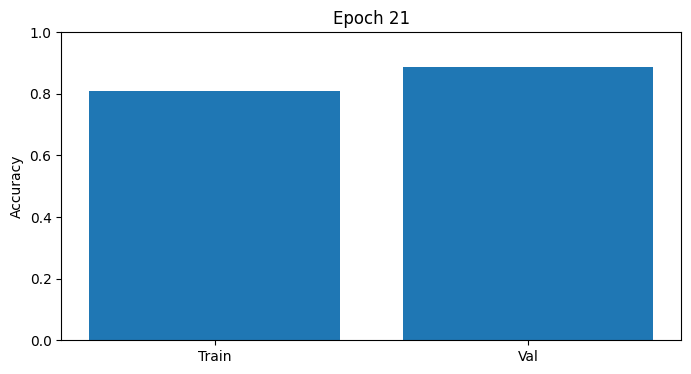

💾 Best model saved.


  0%|          | 0/467 [00:00<?, ?it/s]

Epoch 22/50 | Train Loss: 0.3118 | Train Acc: 0.8092 | Val Acc: 0.8451


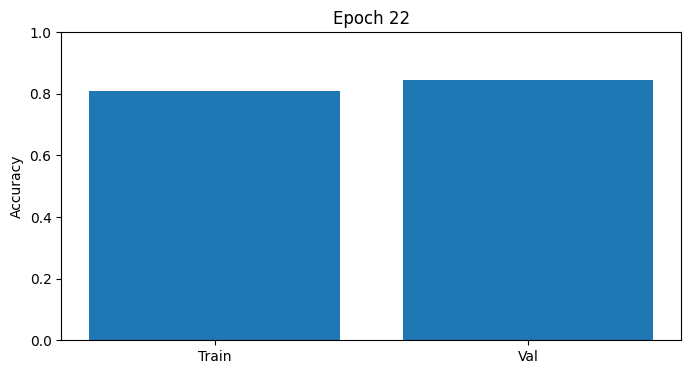

🕒 No improvement for 1 epoch(s).


  0%|          | 0/467 [00:00<?, ?it/s]

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import transforms
from collections import Counter
import numpy as np
import random
import os
from torchvision.datasets import ImageFolder
from matplotlib import pyplot as plt
import pennylane as qml
from pennylane.qnn import TorchLayer
from tqdm.notebook import tqdm

#for loss function 
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Set seeds for reproducibility
def seed_all(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

seed_all(42)

# ========== DEVICE ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ========== PARAMETERS ==========
n_qubits = 6
batch_size = 16
num_classes = 25
num_epochs = 50
lr = 0.0005

# ========== TRANSFORMS WITH DATA AUGMENTATION ==========
# ✅ For training (with augmentation)
train_transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ✅ For validation and test (no augmentation)
eval_transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# ========== DATASETS ==========
train_dataset = ImageFolder('/home/netsec1/dataset_folder/malimg_dataset/train', transform=train_transform)
val_dataset   = ImageFolder('/home/netsec1/dataset_folder/malimg_dataset/val', transform=eval_transform)
test_dataset  = ImageFolder('/home/netsec1/dataset_folder/malimg_dataset/test', transform=eval_transform)
print("**dataset loaded**")
# ========== CLASS WEIGHTS ==========
from sklearn.utils.class_weight import compute_class_weight

labels = [label for _, label in train_dataset.samples]
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels),
                                     y=labels)
class_wts = torch.tensor(class_weights, dtype=torch.float)

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)



# # Weighted sampler
# sample_weights = [class_weights[label] for _, label in train_dataset.samples]
# sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


# ========== QUANTUM CIRCUIT ==========
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
# def quantum_circuit(inputs, weights):
#     # Simplified circuit
#     for i in range(n_qubits):
#         qml.RY(inputs[i], wires=i)
    
#     # Single layer of rotations
#     for i in range(n_qubits):
#         qml.RY(weights[i], wires=i)
    
#     # Reduced entanglement
#     for i in range(n_qubits - 1):
#         qml.CNOT(wires=[i, i + 1])
    
#     return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# weight_shapes = {"weights": (n_qubits,)}  # Reduced parameters

def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    
    for l in range(weights.shape[0]):
        for i in range(n_qubits):
            qml.RY(weights[l][i], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i+1])
    
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (6, n_qubits)}


# ========== CNN + QNN MODEL ==========
class FeatureReduce(nn.Module):
    def __init__(self, final_dim, dropout=0.4):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2, padding=1),    # 128 -> 64
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Conv2d(8, 16, 3, stride=2, padding=1),   # 64 -> 32
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # 32 -> 16
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Conv2d(32, 64, 3, stride=2, padding=1),  # 16 -> 8
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Conv2d(64, 128, 3, stride=2, padding=1),  # ⬅️ Extra block: 8 -> 4
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))                # 4×4 -> 1×1
        )
        self.fc = nn.Linear(128, final_dim)  # ⬅️ Changed from 64 to 128

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


class HybridQNN(nn.Module):
    def __init__(self, n_qubits, num_classes):
        super().__init__()
        self.feature_extractor = FeatureReduce(final_dim=n_qubits)
        self.q_layer = TorchLayer(quantum_circuit, weight_shapes)

        # Adding 4-layer MLP after quantum layer
        self.classifier = nn.Sequential(
            nn.Linear(n_qubits, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, num_classes)
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.tanh(x)
        q_out = torch.stack([self.q_layer(f) for f in x])
        return self.classifier(q_out)

# ========== TRAINING ==========
print("Starting training")

model = HybridQNN(n_qubits=n_qubits, num_classes=num_classes).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.005)
# Convert numpy array to tensor and move to device
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
# Now create the loss function
loss_fn = FocalLoss(alpha=1, gamma=1.5)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, 
    patience=5,
)

def train(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss, correct = 0.0, 0
    
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Clip gradients for stability
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        total_loss += loss.item()
        correct += (outputs.argmax(dim=1) == labels).sum().item()
    
    return total_loss / len(dataloader), correct / len(dataloader.dataset)


def evaluate(model, dataloader, loss_fn, device):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total  # This should never exceed 1.0
    return total_loss / len(dataloader), accuracy

# ========== RUN TRAINING WITH EARLY STOPPING ==========
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# Early Stopping variables
early_stopping_patience = 7
best_val_loss = float('inf')
epochs_without_improvement = 0

print("Start training")

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, loss_fn, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, loss_fn, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    scheduler.step(val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Visualization (bar plot of accuracy per epoch)
    plt.figure(figsize=(8, 4))
    plt.bar(["Train", "Val"], [train_acc, val_acc])
    plt.title(f"Epoch {epoch+1}")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()

    # ===== Early Stopping Logic =====
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict() ,"best_model_ch7.pth")
        print("💾 Best model saved.")
    else:
        epochs_without_improvement += 1
        print(f"🕒 No improvement for {epochs_without_improvement} epoch(s).")

    if epochs_without_improvement >= early_stopping_patience:
        print(f"⏹️ Early stopping triggered after {epoch+1} epochs.")
        


In [ ]:
# for additional 20 epoch training

# ======== RESUME TRAINING FROM BEST MODEL AFTER 50 EPOCHS ========
print("\n🔁 Resuming training for 30 more epochs...")

early_stopping_patience=5 
# Load the best model saved during the first 50 epochs
model.load_state_dict(torch.load("best_model2.pth"))

def train(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss, correct = 0.0, 0
    
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Clip gradients for stability
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        total_loss += loss.item()
        correct += (outputs.argmax(dim=1) == labels).sum().item()
    
    return total_loss / len(dataloader), correct / len(dataloader.dataset)


def evaluate(model, dataloader, loss_fn, device):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total  # This should never exceed 1.0
    return total_loss / len(dataloader), accuracy
    
# Initialize tracking lists if not loaded from earlier
train_losses, val_losses = [], []
train_accs, val_accs = [], []


# Reset early stopping counter and update number of epochs
epochs_without_improvement = 0
best_val_loss = float('inf')  # Reset to find new best in extended training

# Continue training
extra_epochs = 30
for epoch in range(num_epochs, num_epochs + extra_epochs):
    train_loss, train_acc = train(model, train_loader, loss_fn, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, loss_fn, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    scheduler.step(val_loss)
    
    print(f"[CONT] Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Accuracy visualization
    plt.figure(figsize=(8, 4))
    plt.bar(["Train", "Val"], [train_acc, val_acc])
    plt.title(f"[Cont. Epoch {epoch+1}] Accuracy")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()

    # Early Stopping Logic (continued)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), "best_model_final_ch7.pth")
        print("💾 New best model saved (continued training).")
    else:
        epochs_without_improvement += 1
        print(f"🕒 No improvement for {epochs_without_improvement} continued epoch(s).")

    if epochs_without_improvement >= early_stopping_patience:
        print(f"⏹️ Early stopping triggered in continued training at epoch {epoch+1}.")


In [4]:
# printing other performance matrix
from sklearn.metrics import classification_report, confusion_matrix
import torch

model = HybridQNN(n_qubits=n_qubits, num_classes=num_classes).to(device)
model.load_state_dict(torch.load("best_model2.pth"))
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:  # or val_loader
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
print("done__")
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


done__
Classification Report:
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        14
     Agent.FYI       0.87      1.00      0.93        13
     Allaple.A       1.00      1.00      1.00       296
     Allaple.L       1.00      1.00      1.00       160
 Alueron.gen!J       1.00      0.95      0.98        21
     Autorun.K       0.00      0.00      0.00        12
       C2LOP.P       0.00      0.00      0.00        16
   C2LOP.gen!g       0.56      0.95      0.70        20
Dialplatform.B       1.00      1.00      1.00        20
     Dontovo.A       1.00      0.88      0.94        17
      Fakerean       1.00      0.97      0.99        39
 Instantaccess       0.98      1.00      0.99        44
    Lolyda.AA1       1.00      1.00      1.00        22
    Lolyda.AA2       1.00      1.00      1.00        21
    Lolyda.AA3       1.00      0.92      0.96        13
     Lolyda.AT       1.00      1.00      1.00        17
   Malex.gen!J   

/home/netsec1/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/netsec1/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/netsec1/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 🛠️ Recommendations:

# Augment data for underperforming classes.

# Try class-specific oversampling (or re-enable WeightedRandomSampler).

# Use confusion matrix to see which classes are being confused.

# Continue training (maybe unfreeze earlier layers if you’re using transfer learning).